In [4]:
import os
from PIL import Image, ImageOps

# Define source and destination directories
source_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\Data"
destination_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Padding settings
padding_color = (0, 0, 0)  # Black padding

# Iterate over all images in the source directory and subdirectories
for root, _, files in os.walk(source_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")):
            src_file = os.path.join(root, file)
            
            # Open the image
            img = Image.open(src_file)
            
            # Calculate new dimensions (example: make it square)
            max_dim = max(img.size)
            delta_w = max_dim - img.size[0]
            delta_h = max_dim - img.size[1]
            padding = (delta_w // 2, delta_h // 2, delta_w - delta_w // 2, delta_h - delta_h // 2)
            
            # Apply padding
            padded_img = ImageOps.expand(img, border=padding, fill=padding_color)
            
            # Save the padded image to the destination directory
            rel_path = os.path.relpath(root, source_dir)
            dest_path = os.path.join(destination_dir, rel_path)
            os.makedirs(dest_path, exist_ok=True)
            padded_img.save(os.path.join(dest_path, file))
            
            print(f"Padded and saved: {src_file} -> {os.path.join(dest_path, file)}")


Padded and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\Data\carcinoma_in_situ\149143370-149143378-001.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143378-001.BMP
Padded and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\Data\carcinoma_in_situ\149143370-149143378-002.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143378-002.BMP
Padded and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\Data\carcinoma_in_situ\149143370-149143378-003.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143378-003.BMP
Padded and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\Data\carcinoma_in_situ\149143370-149143388-001.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143388-001.BMP
Padded and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\Data\ca

In [6]:
import os
import cv2
import numpy as np

# Define source and destination directories
source_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData"
destination_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Parameters for the Gaussian filter
kernel_size = (5, 5)  # Size of the Gaussian kernel
sigma = 1.0  # Standard deviation of the Gaussian kernel

# Iterate over all images in the source directory and subdirectories
for root, _, files in os.walk(source_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp")):
            # Read the image
            src_file = os.path.join(root, file)
            image = cv2.imread(src_file)

            # Apply Gaussian filter
            filtered_image = cv2.GaussianBlur(image, kernel_size, sigma)

            # Save the filtered image to the destination directory
            rel_path = os.path.relpath(root, source_dir)
            dest_path = os.path.join(destination_dir, rel_path)
            os.makedirs(dest_path, exist_ok=True)
            cv2.imwrite(os.path.join(dest_path, file), filtered_image)
            
            print(f"Filtered and saved: {src_file} -> {os.path.join(dest_path, file)}")


Filtered and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143378-001.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData\carcinoma_in_situ\149143370-149143378-001.BMP
Filtered and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143378-002.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData\carcinoma_in_situ\149143370-149143378-002.BMP
Filtered and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143378-003.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData\carcinoma_in_situ\149143370-149143378-003.BMP
Filtered and saved: D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData\carcinoma_in_situ\149143370-149143388-001.BMP -> D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData\carcinoma_in_situ\149143370-149143388-001.BMP
Filt

In [75]:
import os
import cv2
import numpy as np
from skimage import morphology

# Paths
input_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData"  # Path to filtered images
output_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\SegmentedData"  # Path to save segmented images
os.makedirs(output_dir, exist_ok=True)

# Function to calculate segmentation masks
def process_and_save_segmentation(image_path, save_dir):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not read {image_path}")
        return

    # Preprocessing: Resize and normalize
    image = cv2.resize(image, (256, 256))  # Resize to standard size
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

    # Nucleus segmentation using thresholding
    _, nucleus_mask = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed
    nucleus_mask = morphology.remove_small_objects(nucleus_mask > 0, min_size=50)

    # Cytoplasm segmentation: Inverse of nucleus
    cytoplasm_mask = np.logical_not(nucleus_mask)

    # Save segmented masks
    nucleus_output_path = os.path.join(save_dir, os.path.basename(image_path).replace('.bmp', '_nucleus.png'))
    cytoplasm_output_path = os.path.join(save_dir, os.path.basename(image_path).replace('.bmp', '_cytoplasm.png'))
    cv2.imwrite(nucleus_output_path, (nucleus_mask.astype(np.uint8) * 255))
    cv2.imwrite(cytoplasm_output_path, (cytoplasm_mask.astype(np.uint8) * 255))

# Process each category and save segmented images
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    
    if not os.path.isdir(category_path):
        continue

    # Create corresponding directory in the output path
    category_output_dir = os.path.join(output_dir, category)
    os.makedirs(category_output_dir, exist_ok=True)

    # Process each image in the category
    for file in os.listdir(category_path):
        if not file.lower().endswith('.bmp'):
            continue

        file_path = os.path.join(category_path, file)
        process_and_save_segmentation(file_path, category_output_dir)
        print(f"Processed and saved segmentation for: {file}")

print("\nSegmentation complete.")
print(f"Segmented images saved to: {output_dir}")


Processed and saved segmentation for: 149143370-149143378-001.BMP
Processed and saved segmentation for: 149143370-149143378-002.BMP
Processed and saved segmentation for: 149143370-149143378-003.BMP
Processed and saved segmentation for: 149143370-149143388-001.BMP
Processed and saved segmentation for: 149143370-149143388-002.BMP
Processed and saved segmentation for: 149143370-149143388-003.BMP
Processed and saved segmentation for: 149146635-149146651-001.BMP
Processed and saved segmentation for: 149146635-149146651-002.BMP
Processed and saved segmentation for: 149146635-149146651-003.BMP
Processed and saved segmentation for: 149146837-149146854-001.BMP
Processed and saved segmentation for: 149146886-149146936-001.BMP
Processed and saved segmentation for: 149146886-149146936-002.BMP
Processed and saved segmentation for: 149147060-149147075-001.BMP
Processed and saved segmentation for: 149147060-149147075-002.BMP
Processed and saved segmentation for: 149147060-149147075-003.BMP
Processed 

In [77]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import morphology

# Paths
input_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData"  # Input dataset path
output_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\SegmentedData"  # Output path for segmented images
os.makedirs(output_dir, exist_ok=True)

# List to store results
results = []

# Function to process images, save segmentation masks, and extract features
def process_and_extract_features(image_path, save_dir):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not read {image_path}")
        return None

    # Preprocessing: Resize and normalize
    image = cv2.resize(image, (256, 256))  # Resize to standard size
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

    # Nucleus segmentation using thresholding
    _, nucleus_mask = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)  # Adjust threshold as needed
    nucleus_mask = morphology.remove_small_objects(nucleus_mask > 0, min_size=50)

    # Cytoplasm segmentation: Inverse of nucleus
    cytoplasm_mask = np.logical_not(nucleus_mask)

    # Calculate areas
    nucleus_area = np.sum(nucleus_mask)
    cytoplasm_area = np.sum(cytoplasm_mask)
    nc_ratio = nucleus_area / cytoplasm_area if cytoplasm_area > 0 else 0

    # # Save segmented masks
    # nucleus_output_path = os.path.join(save_dir, os.path.basename(image_path).replace('.bmp', '_nucleus.png'))
    # cytoplasm_output_path = os.path.join(save_dir, os.path.basename(image_path).replace('.bmp', '_cytoplasm.png'))
    # cv2.imwrite(nucleus_output_path, (nucleus_mask.astype(np.uint8) * 255))
    # cv2.imwrite(cytoplasm_output_path, (cytoplasm_mask.astype(np.uint8) * 255))

    return nucleus_area, cytoplasm_area, nc_ratio

# Process each category
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    
    if not os.path.isdir(category_path):
        continue

    # Create corresponding directory in the output path
    category_output_dir = os.path.join(output_dir, category)
    os.makedirs(category_output_dir, exist_ok=True)

    # Process each image in the category
    for file in os.listdir(category_path):
        if not file.lower().endswith('.bmp'):
            continue

        file_path = os.path.join(category_path, file)
        features = process_and_extract_features(file_path, category_output_dir)

        if features:
            nucleus_area, cytoplasm_area, nc_ratio = features
            results.append({
                'Category': category,
                'FileName': file,
                'NucleusArea': nucleus_area,
                'CytoplasmArea': cytoplasm_area,
                'NCRatio': nc_ratio
            })

        print(f"Processed and saved segmentation for: {file}")

# Save results to CSV
csv_path = os.path.join(output_dir, 'nc_ratios.csv')
results_df = pd.DataFrame(results)
results_df.to_csv(csv_path, index=False)

print("\nSegmentation and feature extraction complete.")
print("Segmented images saved to:", output_dir)
print("Feature CSV saved to:", csv_path)


Processed and saved segmentation for: 149143370-149143378-001.BMP
Processed and saved segmentation for: 149143370-149143378-002.BMP
Processed and saved segmentation for: 149143370-149143378-003.BMP
Processed and saved segmentation for: 149143370-149143388-001.BMP
Processed and saved segmentation for: 149143370-149143388-002.BMP
Processed and saved segmentation for: 149143370-149143388-003.BMP
Processed and saved segmentation for: 149146635-149146651-001.BMP
Processed and saved segmentation for: 149146635-149146651-002.BMP
Processed and saved segmentation for: 149146635-149146651-003.BMP
Processed and saved segmentation for: 149146837-149146854-001.BMP
Processed and saved segmentation for: 149146886-149146936-001.BMP
Processed and saved segmentation for: 149146886-149146936-002.BMP
Processed and saved segmentation for: 149147060-149147075-001.BMP
Processed and saved segmentation for: 149147060-149147075-002.BMP
Processed and saved segmentation for: 149147060-149147075-003.BMP
Processed 

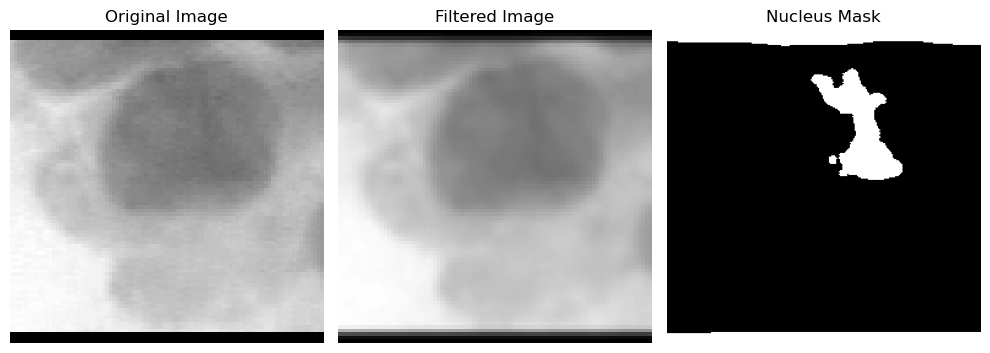

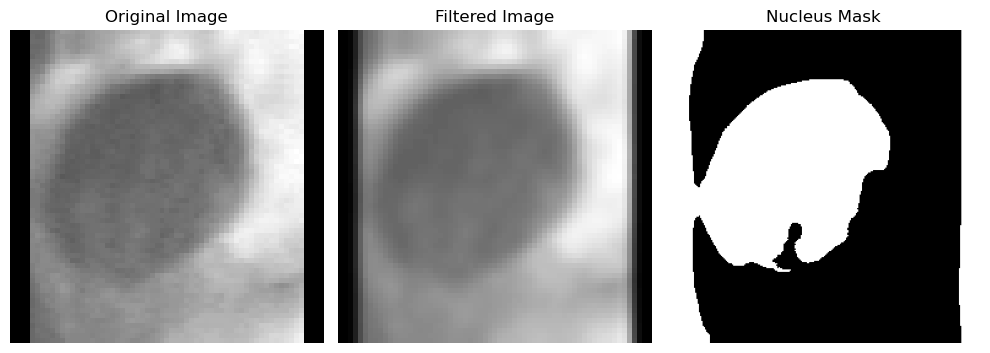

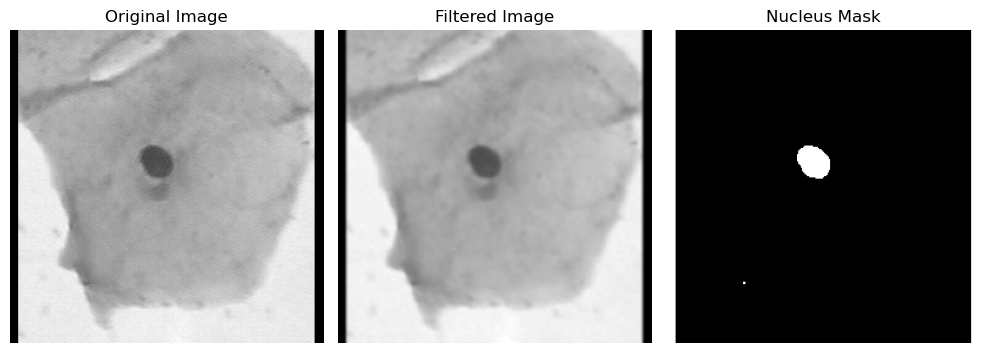

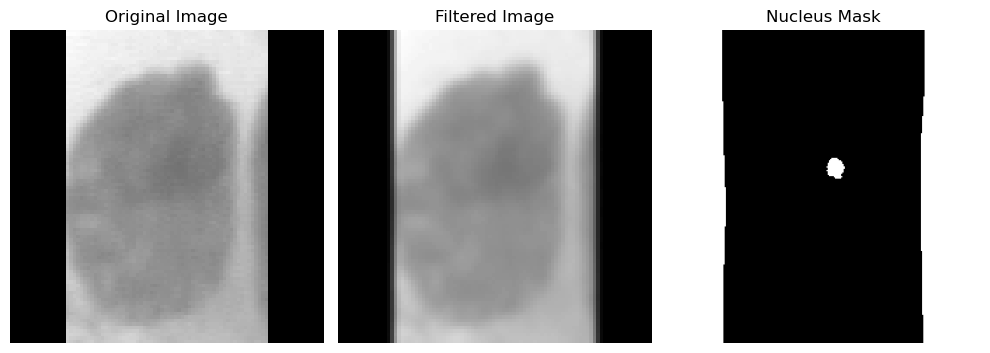

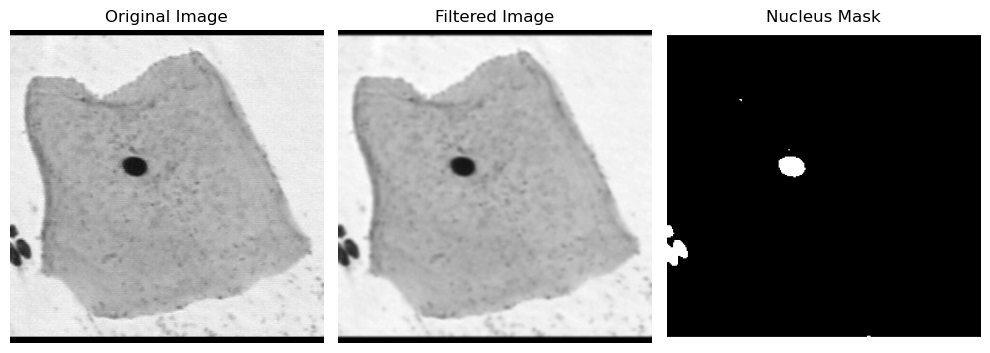

In [81]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Paths
original_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\PaddedData"  # Original images directory
filtered_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData"  # Filtered images directory
segmented_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\SegmentedData"  # Segmented images directory

# Function to display a single sample
def display_sample(original_path, filtered_path, nucleus_path):
    original_image = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    filtered_image = cv2.imread(filtered_path, cv2.IMREAD_GRAYSCALE)
    nucleus_mask = cv2.imread(nucleus_path, cv2.IMREAD_GRAYSCALE)

    # Plot the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(nucleus_mask, cmap='gray')
    plt.title('Nucleus Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get a random sample of 5 images
categories = os.listdir(original_dir)
random_samples = []

while len(random_samples) < 5:
    category = random.choice(categories)
    category_original_dir = os.path.join(original_dir, category)
    if not os.path.isdir(category_original_dir):
        continue

    files = [f for f in os.listdir(category_original_dir) if f.lower().endswith('.bmp')]
    if not files:
        continue

    file = random.choice(files)
    original_path = os.path.join(original_dir, category, file)
    filtered_path = os.path.join(filtered_dir, category, file)
    nucleus_path = os.path.join(segmented_dir, category, file.replace('.bmp', '_nucleus.png'))

    # Ensure all required files exist
    if all(os.path.exists(p) for p in [filtered_path, nucleus_path]):
        random_samples.append((original_path, filtered_path, nucleus_path))

# Display the samples
for sample in random_samples:
    display_sample(*sample)


In [134]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, concatenate, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Paths
segmented_data_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\SegmentedData"
csv_path = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\SegmentedData\nc_ratios.csv"

# Parameters
img_size = (128, 128)
batch_size = 32
num_classes = 7  # Update based on the number of categories
epochs = 20

In [136]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, concatenate, Activation

def create_squeezenet(input_shape=(128, 128, 3), num_classes=7):
    input_tensor = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(96, (7, 7), strides=(2, 2), activation='relu', padding='same')(input_tensor)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Fire modules
    def fire_module(x, squeeze, expand):
        squeeze_layer = Conv2D(squeeze, (1, 1), activation='relu', padding='same')(x)
        expand_1x1 = Conv2D(expand, (1, 1), activation='relu', padding='same')(squeeze_layer)
        expand_3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(squeeze_layer)
        return concatenate([expand_1x1, expand_3x3])

    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=64, expand=256)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = fire_module(x, squeeze=64, expand=256)

    # Final layers
    x = Dropout(0.5)(x)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    output_tensor = Activation('softmax')(x)

    return Model(input_tensor, output_tensor)

# Create the model
model = create_squeezenet(input_shape=(128, 128, 3), num_classes=7)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_392 (Conv2D) │ (None, 64, 64,    │     14,208 │ input_layer_16[0… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_47    │ (None, 32, 32,    │          0 │ conv2d_392[0][0]  │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_393 (Conv2D) │ (None, 32, 32,    │      1,552 │ max_pooling2d_47… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_394 (Conv2D) │ (None, 32, 32,    │      1,088 │ conv2d_393[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_395 (Conv2D) │ (None, 32, 32,    │      9,280 │ conv2d_393[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_120     │ (None, 32, 32,    │          0 │ conv2d_394[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_395[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_396 (Conv2D) │ (None, 32, 32,    │      2,064 │ concatenate_120[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_397 (Conv2D) │ (None, 32, 32,    │      1,088 │ conv2d_396[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_398 (Conv2D) │ (None, 32, 32,    │      9,280 │ conv2d_396[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_121     │ (None, 32, 32,    │          0 │ conv2d_397[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_398[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_399 (Conv2D) │ (None, 32, 32,    │      4,128 │ concatenate_121[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_400 (Conv2D) │ (None, 32, 32,    │      4,224 │ conv2d_399[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_401 (Conv2D) │ (None, 32, 32,    │     36,992 │ conv2d_399[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_122     │ (None, 32, 32,    │          0 │ conv2d_400[0][0], │
│ (Concatenate)       │ 256)              │            │ conv2d_401[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_48    │ (None, 16, 16,    │          0 │ concatenate_122[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_402 (Conv2D) │ (None, 16, 16,    │      8,224 │ max_pooling2d_48

 Total params: 739,015 (2.82 MB)

 Trainable params: 739,015 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# Prepare Image Data
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
)

val_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    steps_per_epoch=train_gen.samples // batch_size,
    validation_steps=val_gen.samples // batch_size,
    verbose=1,
)


Found 736 images belonging to 7 classes.
Found 181 images belonging to 7 classes.
Epoch 1/20


C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 450ms/step - accuracy: 0.1560 - loss: 1.9495 - val_accuracy: 0.2000 - val_loss: 1.9285
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 726ms/step - accuracy: 0.2059 - loss: 1.9109 - val_accuracy: 0.2125 - val_loss: 1.8665
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 668ms/step - accuracy: 0.2093 - loss: 1.8854 - val_accuracy: 0.2000 - val_loss: 1.8559
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 625ms/step - accuracy: 0.2126 - loss: 1.8587 - val_accuracy: 0.2062 - val_loss: 1.9022
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 622ms/step - accuracy: 0.2021 - loss: 1.9002 - val_accuracy: 0.1937 - val_loss: 1.8727
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 628ms/step - accuracy: 0.2151 - loss: 1.8623 - val_accuracy: 0.2438 - val_loss: 1.8108
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 613ms/step - accuracy: 0.2605 - loss: 1.7961 - val_accuracy: 0.2375 - val_loss: 1.8075
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 667ms/step - accuracy: 0.2133 - loss: 1.8425 - val_accuracy: 0.262

Gazelle Optimizer

In [144]:
data_dir = 'D:/SPOORTHI/Masters/Project Details/Herlev Dataset/SegmentedData'
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation')

Found 736 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


In [146]:
from tensorflow.keras.optimizers import Optimizer
import tensorflow as tf

class GazelleOptimizer(Optimizer):
    def __init__(self, learning_rate=0.001, beta=0.9, name="GazelleOptimizer", **kwargs):
        # Pass learning_rate as the first argument to the parent constructor
        super().__init__(learning_rate=learning_rate, name=name, **kwargs)

        # Store other parameters
        self.learning_rate = learning_rate
        self.beta = beta

    def apply_gradients(self, grads_and_vars, name=None, experimental_aggregate_gradients=True):
    # Example: Apply gradient updates based on custom logic.
    # grads_and_vars is a list of (gradient, variable) pairs
        for grad, var in grads_and_vars:
        # Custom logic to apply gradients, e.g., using beta, learning_rate, etc.
            new_grad = grad * self.learning_rate  # Modify this logic as needed
        # Apply the updated gradient to the variable
            var.assign_sub(new_grad)  
    def get_config(self):
        # Configuration for saving/loading the optimizer
        config = {
            'learning_rate': self.learning_rate,
            'beta': self.beta
        }
        base_config = super(GazelleOptimizer, self).get_config()
        return {**base_config, **config}

In [148]:
# Define the Fire module for the SqueezeNet model
def fire_module(x, squeeze_filters, expand_filters):
    squeeze = Conv2D(squeeze_filters, (1, 1), activation='relu', padding='valid')(x)
    squeeze = BatchNormalization()(squeeze)

    expand_1x1 = Conv2D(expand_filters, (1, 1), activation='relu', padding='valid')(squeeze)
    expand_3x3 = Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)

    output = Concatenate()([expand_1x1, expand_3x3])
    output = BatchNormalization()(output)

    return output


# Build the Improved SqueezeNet model for categorical classification
def build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7, learning_rate=0.001, alpha=0.9, weight_decay=0.0):
    input_layer = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(96, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Fire modules
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = Dropout(0.5)(x)  # Regularization

    # Output layer for categorical classification (7 classes)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)  # 7 outputs for categorical classification
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    output_layer = Activation('softmax')(x)  # Softmax activation for categorical classification

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model with Gazelle optimizer
    gazelle_optimizer = GazelleOptimizer(learning_rate=0.001, beta=0.9)
    model.compile(optimizer=gazelle_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [150]:
if __name__ == "__main__":
    # Define model
    model = build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7)

    # Display model architecture
    model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_418 (Conv2D) │ (None, 64, 64,    │      2,688 │ input_layer_17[0… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        384 │ conv2d_418[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_50    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_419 (Conv2D) │ (None, 32, 32,    │      1,552 │ max_pooling2d_50… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_419[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_420 (Conv2D) │ (None, 32, 32,    │      1,088 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_421 (Conv2D) │ (None, 32, 32,    │      9,280 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_128     │ (None, 32, 32,    │          0 │ conv2d_420[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_421[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ concatenate_128[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_422 (Conv2D) │ (None, 32, 32,    │      2,064 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_422[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_423 (Conv2D) │ (None, 32, 32,    │      1,088 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_424 (Conv2D) │ (None, 32, 32,    │      9,280 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_129     │ (None, 32, 32,    │          0 │ conv2d_423[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_424[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ concatenate_129[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_425 (Conv2D) │ (None, 32, 32,    │      4,128 │ batch_normalizat

 Total params: 739,427 (2.82 MB)

 Trainable params: 733,461 (2.80 MB)

 Non-trainable params: 5,966 (23.30 KB)

In [152]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
history_squeezenet = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[tensorboard_callback]
)

C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 790ms/step - accuracy: 0.1176 - loss: 1.9647 - val_accuracy: 0.1989 - val_loss: 1.9375
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 709ms/step - accuracy: 0.1602 - loss: 1.9529 - val_accuracy: 0.1989 - val_loss: 1.9343
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 688ms/step - accuracy: 0.1545 - loss: 1.9459 - val_accuracy: 0.1989 - val_loss: 1.9321
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1501 - loss: 1.9461 - val_accuracy: 0.1989 - val_loss: 1.9309
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 725ms/step - accuracy: 0.1717 - loss: 1.9258 - val_accuracy: 0.1989 - val_loss: 1.9262
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 769ms/step - accuracy: 0.2228 - loss: 1.9336 - val_accuracy: 0.1989 - val_loss: 1.9188
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 823ms/step - accuracy: 0.1549 - loss: 1.9342 - val_accuracy: 0.2155 - val_loss: 1.9159
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1761 - loss: 1.9121 - val_accuracy: 

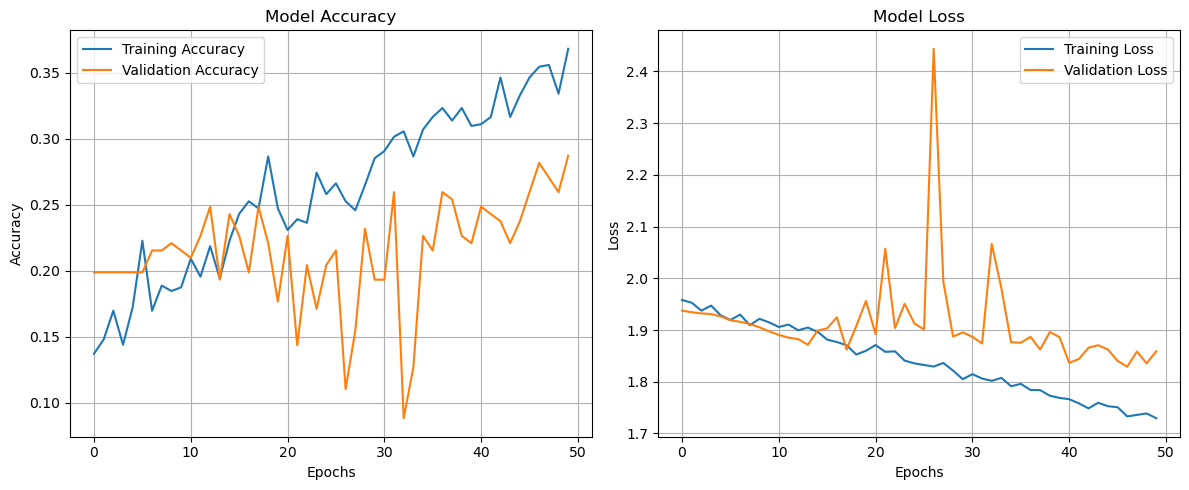

In [153]:
import matplotlib.pyplot as plt

# Extract training history
history = history_squeezenet.history

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

Incorporating Gazelle With Filtered and Padded Images

In [155]:
data_dir = 'D:/SPOORTHI/Masters/Project Details/Herlev Dataset/PaddedData'
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation')

Found 736 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


In [156]:
from tensorflow.keras.optimizers import Optimizer
import tensorflow as tf

class GazelleOptimizer(Optimizer):
    def __init__(self, learning_rate=0.001, beta=0.9, name="GazelleOptimizer", **kwargs):
        # Pass learning_rate as the first argument to the parent constructor
        super().__init__(learning_rate=learning_rate, name=name, **kwargs)

        # Store other parameters
        self.learning_rate = learning_rate
        self.beta = beta

    def apply_gradients(self, grads_and_vars, name=None, experimental_aggregate_gradients=True):
    # Example: Apply gradient updates based on custom logic.
    # grads_and_vars is a list of (gradient, variable) pairs
        for grad, var in grads_and_vars:
        # Custom logic to apply gradients, e.g., using beta, learning_rate, etc.
            new_grad = grad * self.learning_rate  # Modify this logic as needed
        # Apply the updated gradient to the variable
            var.assign_sub(new_grad)  
    def get_config(self):
        # Configuration for saving/loading the optimizer
        config = {
            'learning_rate': self.learning_rate,
            'beta': self.beta
        }
        base_config = super(GazelleOptimizer, self).get_config()
        return {**base_config, **config}

In [157]:
# Define the Fire module for the SqueezeNet model
def fire_module(x, squeeze_filters, expand_filters):
    squeeze = Conv2D(squeeze_filters, (1, 1), activation='relu', padding='valid')(x)
    squeeze = BatchNormalization()(squeeze)

    expand_1x1 = Conv2D(expand_filters, (1, 1), activation='relu', padding='valid')(squeeze)
    expand_3x3 = Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)

    output = Concatenate()([expand_1x1, expand_3x3])
    output = BatchNormalization()(output)

    return output


# Build the Improved SqueezeNet model for categorical classification
def build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7, learning_rate=0.001, alpha=0.9, weight_decay=0.0):
    input_layer = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(96, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Fire modules
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = Dropout(0.5)(x)  # Regularization

    # Output layer for categorical classification (7 classes)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)  # 7 outputs for categorical classification
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    output_layer = Activation('softmax')(x)  # Softmax activation for categorical classification

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model with Gazelle optimizer
    gazelle_optimizer = GazelleOptimizer(learning_rate=0.001, beta=0.9)
    model.compile(optimizer=gazelle_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [158]:
if __name__ == "__main__":
    # Define model
    model = build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7)

    # Display model architecture
    model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_444 (Conv2D) │ (None, 64, 64,    │      2,688 │ input_layer_18[0… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        384 │ conv2d_444[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_53    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_445 (Conv2D) │ (None, 32, 32,    │      1,552 │ max_pooling2d_53… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_445[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_446 (Conv2D) │ (None, 32, 32,    │      1,088 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_447 (Conv2D) │ (None, 32, 32,    │      9,280 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_136     │ (None, 32, 32,    │          0 │ conv2d_446[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_447[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ concatenate_136[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_448 (Conv2D) │ (None, 32, 32,    │      2,064 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_448[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_449 (Conv2D) │ (None, 32, 32,    │      1,088 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_450 (Conv2D) │ (None, 32, 32,    │      9,280 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_137     │ (None, 32, 32,    │          0 │ conv2d_449[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_450[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ concatenate_137[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_451 (Conv2D) │ (None, 32, 32,    │      4,128 │ batch_normalizat

 Total params: 739,427 (2.82 MB)

 Trainable params: 733,461 (2.80 MB)

 Non-trainable params: 5,966 (23.30 KB)

In [159]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
history_squeezenet = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[tensorboard_callback]
)

Epoch 1/50


C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1878 - loss: 1.9323 - val_accuracy: 0.2155 - val_loss: 1.9388
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1860 - loss: 1.9242 - val_accuracy: 0.2155 - val_loss: 1.9398
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2313 - loss: 1.8943 - val_accuracy: 0.2155 - val_loss: 1.9443
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2871 - loss: 1.8626 - val_accuracy: 0.2155 - val_loss: 1.9512
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3056 - loss: 1.8400 - val_accuracy: 0.2155 - val_loss: 1.9600
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2964 - loss: 1.8372 - val_accuracy: 0.2431 - val_loss: 1.9686
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3192 - loss: 1.7974 - val_accuracy: 0.0718 - val_loss: 1.9727
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3870 - loss: 1.7748 - val_accuracy: 0.1050 - val_loss: 1.9921
Epo

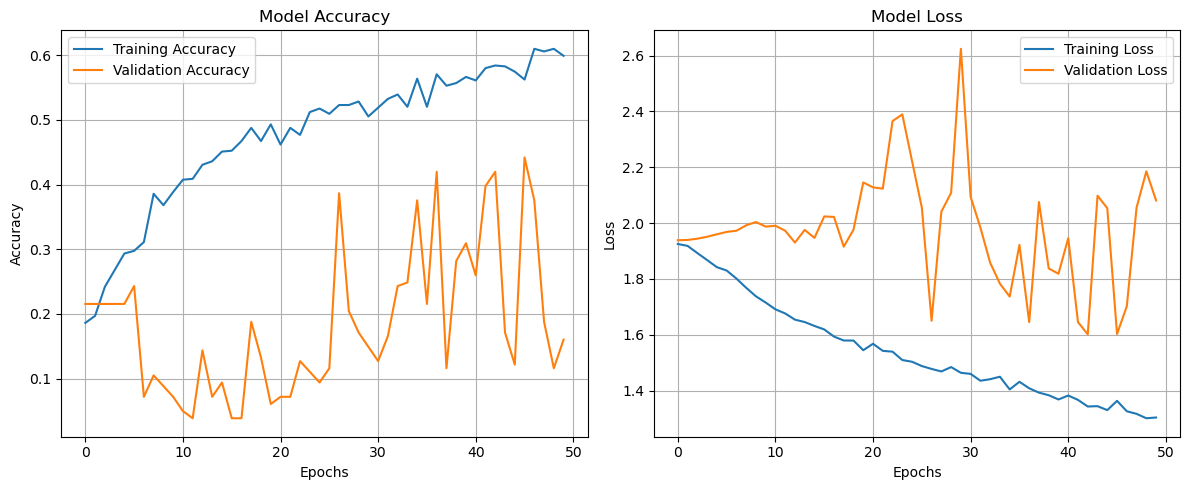

In [160]:
import matplotlib.pyplot as plt

# Extract training history
history = history_squeezenet.history

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


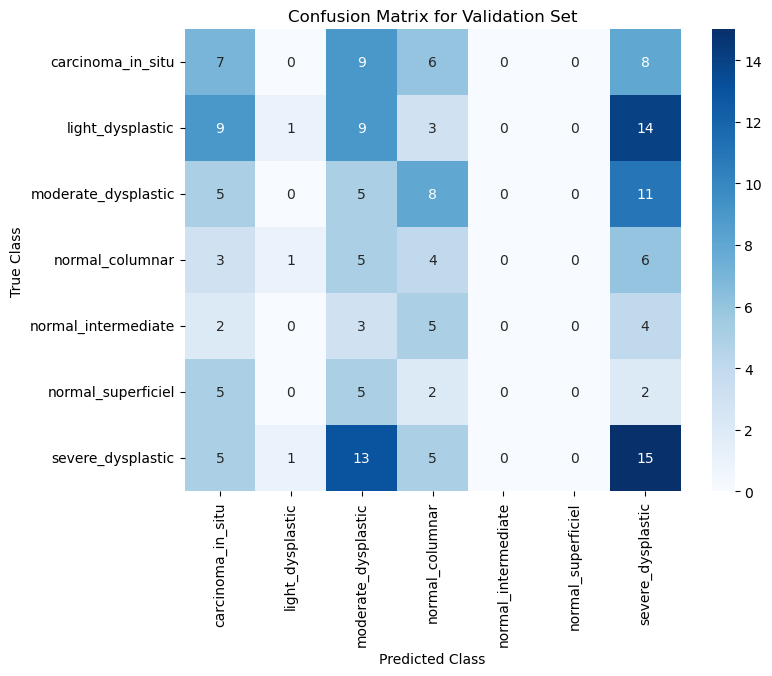

C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Precision: 0.1815
Validation Recall: 0.1768
Validation F1-Score: 0.1473
Validation MCC: 0.0084
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step


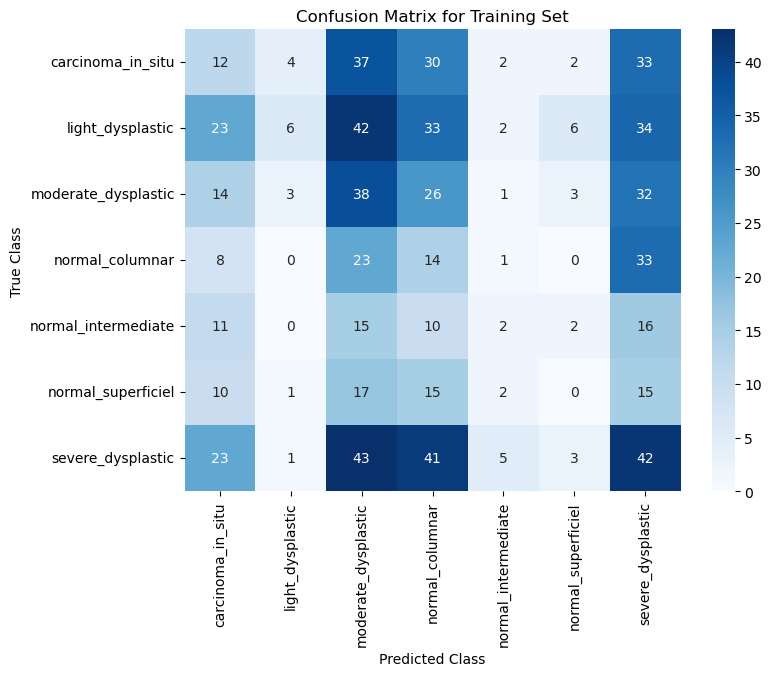

Training Precision: 0.1898
Training Recall: 0.1549
Training F1-Score: 0.1350
Training MCC: -0.0072


In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef,accuracy_score
# Get predictions for evaluation

# Get predictions for validation set
y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

# Convert predictions to class indices
y_pred_val_classes = np.argmax(y_pred_val, axis=1)

# Compute confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_true_val, y_pred_val_classes)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Calculate other evaluation metrics
precision_val = precision_score(y_true_val, y_pred_val_classes, average='weighted')
recall_val = recall_score(y_true_val, y_pred_val_classes, average='weighted')
f1_val = f1_score(y_true_val, y_pred_val_classes, average='weighted')
mcc_val = matthews_corrcoef(y_true_val, y_pred_val_classes)

# Print the metrics
print(f"Validation Precision: {precision_val:.4f}")
print(f"Validation Recall: {recall_val:.4f}")
print(f"Validation F1-Score: {f1_val:.4f}")
print(f"Validation MCC: {mcc_val:.4f}")

# Get predictions for training set
y_pred_train = model.predict(train_generator)
y_true_train = train_generator.classes

# Convert predictions to class indices
y_pred_train_classes = np.argmax(y_pred_train, axis=1)

# Compute confusion matrix for training set
conf_matrix_train = confusion_matrix(y_true_train, y_pred_train_classes)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Calculate other evaluation metrics for training data
precision_train = precision_score(y_true_train, y_pred_train_classes, average='weighted')
recall_train = recall_score(y_true_train, y_pred_train_classes, average='weighted')
f1_train = f1_score(y_true_train, y_pred_train_classes, average='weighted')
mcc_train = matthews_corrcoef(y_true_train, y_pred_train_classes)

# Print the training metrics
print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")
print(f"Training F1-Score: {f1_train:.4f}")
print(f"Training MCC: {mcc_train:.4f}")

In [172]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef,accuracy_score
# Get predictions for evaluation
y_pred = model.predict(val_generator)
y_true = val_generator.classes

# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, f1-score, MCC, and accuracy for validation
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
mcc = matthews_corrcoef(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)

# Print the validation metrics
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-Score: {f1:.4f}")
print(f"Validation MCC: {mcc:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Calculate metrics on the training set
y_train_pred = model.predict(train_generator)
y_train_true = train_generator.classes

# Convert predictions to class indices
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# Calculate precision, recall, f1-score, MCC, and accuracy for training data
train_precision = precision_score(y_train_true, y_train_pred_classes, average='weighted')
train_recall = recall_score(y_train_true, y_train_pred_classes, average='weighted')
train_f1 = f1_score(y_train_true, y_train_pred_classes, average='weighted')
train_mcc = matthews_corrcoef(y_train_true, y_train_pred_classes)
train_accuracy = accuracy_score(y_train_true, y_train_pred_classes)

# Print the training metrics
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Training MCC: {train_mcc:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
Validation Precision: 0.2445
Validation Recall: 0.1823
Validation F1-Score: 0.1552
Validation MCC: 0.0154
Validation Accuracy: 0.1823


C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step
Training Precision: 0.1591
Training Recall: 0.1617
Training F1-Score: 0.1368
Training MCC: 0.0013
Training Accuracy: 0.1617


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


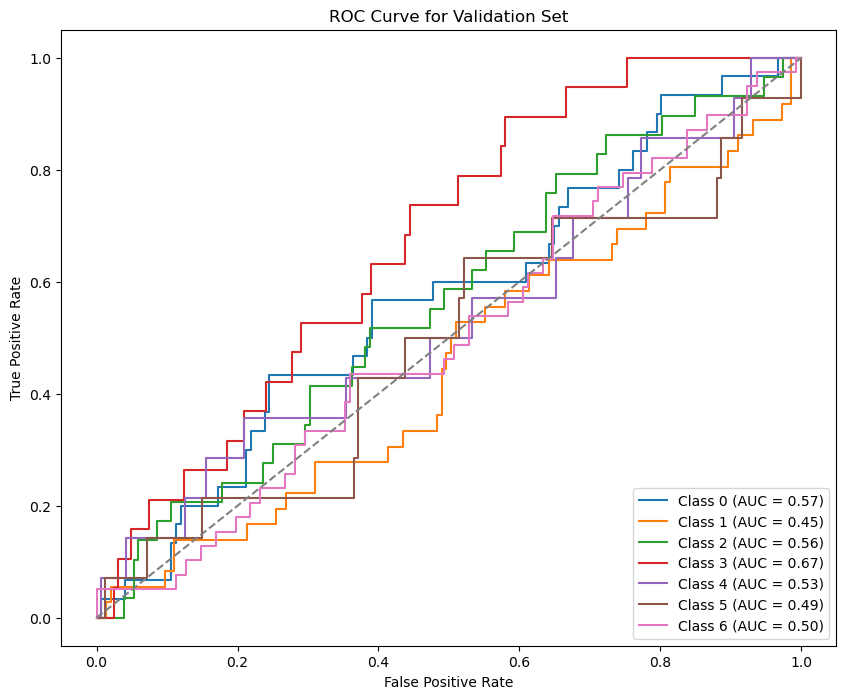

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step


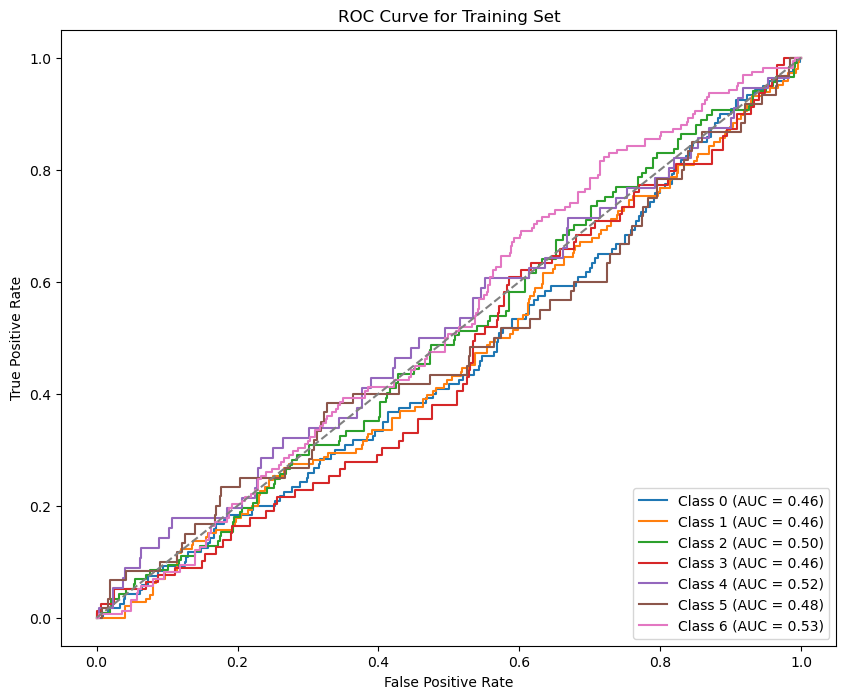

In [175]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for validation set
y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

# Binarize the true labels for multi-class ROC curve (One-hot encoding)
y_true_val_bin = label_binarize(y_true_val, classes=list(range(num_classes)))

# Compute ROC curve and AUC for each class
fpr, tpr, thresholds = {}, {}, {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_true_val_bin[:, i], y_pred_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for validation set
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (no discrimination) as a reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve for Validation Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Now repeat the process for the training set
y_pred_train = model.predict(train_generator)
y_true_train = train_generator.classes

# Binarize the true labels for training set
y_true_train_bin = label_binarize(y_true_train, classes=list(range(num_classes)))

# Compute ROC curve and AUC for each class
fpr_train, tpr_train, thresholds_train = {}, {}, {}
roc_auc_train = {}

for i in range(num_classes):
    fpr_train[i], tpr_train[i], thresholds_train[i] = roc_curve(y_true_train_bin[:, i], y_pred_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plot ROC curve for training set
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    plt.plot(fpr_train[i], tpr_train[i], label=f'Class {i} (AUC = {roc_auc_train[i]:.2f})')

# Plot the diagonal line (no discrimination) as a reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve for Training Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [96]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Dropout,
    GlobalAveragePooling2D,
    concatenate,
    Dense,
    BatchNormalization,
    Flatten,
    Concatenate,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Paths
segmented_data_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\SegmentedData"
csv_path = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\SegmentedData\nc_ratios.csv"

# Parameters
img_size = (128, 128)
batch_size = 32
num_classes = 7
epochs = 10

# Load nc_ratios.csv and preprocess
nc_ratios_df = pd.read_csv(csv_path)

# Split CSV into training and validation
train_csv, val_csv = train_test_split(nc_ratios_df, test_size=0.2, random_state=42)

# Standardize NCRatio
scaler = StandardScaler()
train_csv['NCRatio'] = scaler.fit_transform(train_csv[['NCRatio']])
val_csv['NCRatio'] = scaler.transform(val_csv[['NCRatio']])

# Function to create SqueezeNet architecture
def create_squeezenet(input_shape=(128, 128, 3), num_classes=7):
    input_tensor = Input(shape=input_shape)

    # Initial convolution
    x = Conv2D(96, (7, 7), strides=(2, 2), activation="relu", padding="same")(input_tensor)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)

    # Fire modules
    def fire_module(x, squeeze, expand):
        squeeze_layer = Conv2D(squeeze, (1, 1), activation="relu", padding="same")(x)
        expand_1x1 = Conv2D(expand, (1, 1), activation="relu", padding="same")(squeeze_layer)
        expand_3x3 = Conv2D(expand, (3, 3), activation="relu", padding="same")(squeeze_layer)
        return concatenate([expand_1x1, expand_3x3])

    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)
    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=64, expand=256)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)
    x = fire_module(x, squeeze=64, expand=256)

    # Final layers for the image branch
    x = Dropout(0.5)(x)
    x = Conv2D(num_classes, (1, 1), activation="relu", padding="same")(x)
    x = GlobalAveragePooling2D()(x)

    return input_tensor, x


# Image preprocessing
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,  # To match with nc_ratios.csv order
    subset="training",
)

val_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,  # To match with nc_ratios.csv order
    subset="validation",
)



Found 736 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


In [110]:
print(train_csv.columns)


Index(['Category', 'FileName', 'NucleusArea', 'CytoplasmArea', 'NCRatio'], dtype='object')


In [112]:
train_csv.columns = train_csv.columns.str.strip()  # Remove leading/trailing spaces


In [116]:
print(train_csv.head())


                Category                     FileName  NucleusArea  \
794    severe_dysplastic  149142457-149142465-001.BMP        29166   
25     carcinoma_in_situ  149148669-149148707-001.BMP        37639   
84     carcinoma_in_situ  149185788-149185824-001.BMP        52341   
10     carcinoma_in_situ  149146886-149146936-001.BMP        33121   
344  moderate_dysplastic  149014631-149014654-003.BMP        32216   

     CytoplasmArea   NCRatio  
794          36370 -0.468805  
25           27897 -0.384196  
84           13195  0.020461  
10           32415 -0.434816  
344          33320 -0.443305  


In [126]:
# Remove the sequence that seems to change (e.g., -001, -002) from the filenames
train_csv["FileName_core"] = train_csv["FileName"].str.extract(r'(\d+-\d+-\d+)')  # Extract the first part
train_image_filenames_core = [f.split('.')[0] for f in train_image_filenames]

# Check if the core parts of filenames match
missing_filenames = [f for f in train_image_filenames_core if f not in train_csv["FileName_core"].values]
print(f"Missing core filenames: {missing_filenames[:10]}")  # Check the first 10 missing filenames


Missing core filenames: ['149181904-149181951-002', '149181904-149182017-001', '149181904-149182017-003', '149182125-149182135-003', '149182550-149182571-004', '149182550-149182608-005', '149182657-149182681-002', '149182657-149182713-002', '149185405-149185423-002', '149185497-149185527-001']


In [ ]:
# Image preprocessing
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,  # To match with nc_ratios.csv order
    subset="training",
)

val_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,  # To match with nc_ratios.csv order
    subset="validation",
)

# Ensure the order of images matches nc_ratios
train_image_filenames = [os.path.basename(f) for f in train_gen.filenames]
val_image_filenames = [os.path.basename(f) for f in val_gen.filenames]

# Align CSV and generators
train_nc_ratios = train_csv.set_index("Image").loc[train_image_filenames]["nc_ratio"].values
val_nc_ratios = val_csv.set_index("Image").loc[val_image_filenames]["nc_ratio"].values

# Create combined model
image_input, image_output = create_squeezenet(input_shape=(128, 128, 3), num_classes=num_classes)

# Numerical input for nc_ratios
numerical_input = Input(shape=(1,), name="numerical_input")
numerical_dense = Dense(64, activation="relu")(numerical_input)

# Combine image and numerical branches
combined = Concatenate()([image_output, numerical_dense])
x = Dense(128, activation="relu")(combined)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation="softmax")(x)

# Final model
model = Model(inputs=[image_input, numerical_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(
    [train_gen, train_nc_ratios],
    validation_data=([val_gen, val_nc_ratios]),
    epochs=epochs,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    verbose=1,
)

# Evaluate model
loss, accuracy = model.evaluate([val_gen, val_nc_ratios])
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


In [ ]:
# Prepare Image Data
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
)

val_gen = datagen.flow_from_directory(
    segmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
)

# SqueezeNet Model
input_tensor = Input(shape=(128, 128, 3))  # Adjust input shape as needed
base_model = SqueezeNet(input_tensor=input_tensor, include_top=False, weights=None)

# Add Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
output_tensor = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_tensor)

# Compile Model with Gazelle Optimization (Adam Optimizer)
optimizer = Adam(learning_rate=0.001)  # Gazelle optimization can be extended here
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,  # Adjust epochs based on requirement
    steps_per_epoch=train_gen.samples // batch_size,
    validation_steps=val_gen.samples // batch_size,
    verbose=1,
)

# Evaluate the Model
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save the Model
model.save("squeezenet_cervical_cancer.h5")

# Classification Report
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=list(val_gen.class_indices.keys())))

In [14]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Paths
data_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation and normalization
transform = {
    "train": transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}



In [16]:
# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform["train"])
test_dataset = datasets.ImageFolder(test_dir, transform=transform["test"])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize SqueezeNet
model = models.squeezenet1_1(pretrained=True)
model.num_classes = len(train_dataset.classes)
model.classifier[1] = nn.Conv2d(512, model.num_classes, kernel_size=(1, 1), stride=(1, 1))
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100.*correct/total:.2f}%")



Epoch [1/10], Loss: 1.9085, Accuracy: 23.53%
Epoch [2/10], Loss: 1.7994, Accuracy: 24.21%
Epoch [3/10], Loss: 1.7278, Accuracy: 29.27%
Epoch [4/10], Loss: 1.5992, Accuracy: 36.25%
Epoch [5/10], Loss: 1.5188, Accuracy: 37.62%
Epoch [6/10], Loss: 1.5426, Accuracy: 35.84%
Epoch [7/10], Loss: 1.5103, Accuracy: 38.17%
Epoch [8/10], Loss: 1.4470, Accuracy: 39.95%
Epoch [9/10], Loss: 1.4684, Accuracy: 38.30%
Epoch [10/10], Loss: 1.4605, Accuracy: 40.08%


In [22]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Statistics for loss
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Training accuracy for the epoch
    train_accuracy = 100. * correct_train / total_train
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")


Epoch [1/10], Loss: 1.3242, Train Accuracy: 44.73%
Epoch [2/10], Loss: 1.3064, Train Accuracy: 46.79%
Epoch [3/10], Loss: 1.2557, Train Accuracy: 49.79%
Epoch [4/10], Loss: 1.2863, Train Accuracy: 47.74%
Epoch [5/10], Loss: 1.2397, Train Accuracy: 48.43%
Epoch [6/10], Loss: 1.4066, Train Accuracy: 43.78%
Epoch [7/10], Loss: 1.2675, Train Accuracy: 47.74%
Epoch [8/10], Loss: 1.3542, Train Accuracy: 44.60%
Epoch [9/10], Loss: 1.2541, Train Accuracy: 48.02%
Epoch [10/10], Loss: 1.2240, Train Accuracy: 47.88%


In [19]:
# Testing loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Test Accuracy: {100.*correct/total:.2f}%")



Test Accuracy: 36.56%


In [ ]:
# Save the trained model
torch.save(model.state_dict(), os.path.join(data_dir, "squeezenet_model.pth"))
print("Model saved to 'squeezenet_model.pth'")


Gazelle Optimizer

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Fire module for the SqueezeNet model
def fire_module(x, squeeze_filters, expand_filters):
    squeeze = layers.Conv2D(squeeze_filters, (1, 1), activation='relu', padding='valid')(x)
    squeeze = layers.BatchNormalization()(squeeze)

    expand_1x1 = layers.Conv2D(expand_filters, (1, 1), activation='relu', padding='valid')(squeeze)
    expand_3x3 = layers.Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)

    output = layers.Concatenate()([expand_1x1, expand_3x3])
    output = layers.BatchNormalization()(output)

    return output

# Build the SqueezeNet model for image classification
def build_squeezenet(input_shape=(128, 128, 3), num_classes=2):
    input_layer = layers.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(96, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Fire modules
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = layers.Dropout(0.5)(x)  # Regularization

    # Output layer for classification
    x = layers.Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    output_layer = layers.Activation('softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)

    return model

# Initialize and compile the model
model = build_squeezenet(input_shape=(128, 128, 3), num_classes=2)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_312 (Conv2D) │ (None, 64, 64,    │      2,688 │ input_layer_12[0… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        384 │ conv2d_312[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_36    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_313 (Conv2D) │ (None, 32, 32,    │      1,552 │ max_pooling2d_36… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_313[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_314 (Conv2D) │ (None, 32, 32,    │      1,088 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_315 (Conv2D) │ (None, 32, 32,    │      9,280 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_96      │ (None, 32, 32,    │          0 │ conv2d_314[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_315[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ concatenate_96[0… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_316 (Conv2D) │ (None, 32, 32,    │      2,064 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │         64 │ conv2d_316[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_317 (Conv2D) │ (None, 32, 32,    │      1,088 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_318 (Conv2D) │ (None, 32, 32,    │      9,280 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_97      │ (None, 32, 32,    │          0 │ conv2d_317[0][0], │
│ (Concatenate)       │ 128)              │            │ conv2d_318[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ concatenate_97[0… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_319 (Conv2D) │ (None, 32, 32,    │      4,128 │ batch_normalizat

 Total params: 736,842 (2.81 MB)

 Trainable params: 730,886 (2.79 MB)

 Non-trainable params: 5,956 (23.27 KB)

In [67]:
train_dir = r'D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady\train'
test_dir = r'D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady\test'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # Binary classification for cancerous or non-cancerous
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 731 images belonging to 7 classes.
Found 186 images belonging to 7 classes.


C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the custom SqueezeNet-like architecture
def build_model(input_shape=(128, 128, 3)):
    input_layer = Input(shape=input_shape)
    
    # Initial convolutional layer
    x = Conv2D(96, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Add more layers (Fire modules or similar)
    x = Conv2D(64, (1, 1), activation='relu', padding='valid')(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
    x = Flatten()(x)
    
    # Dense layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # Output layer for binary classification (1 output)
    output_layer = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model with a binary crossentropy loss for binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
model = build_model(input_shape=(128, 128, 3))

# Train the model using the train and validation generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.1983 - loss: -1088.8527

C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.1984 - loss: -1164.7921 - val_accuracy: 0.2000 - val_loss: -3017.3706
Epoch 2/50
 1/22 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.1562 - loss: -8666.1113

C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1562 - loss: -8666.1113 - val_accuracy: 0.2000 - val_loss: -3622.9707
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - accuracy: 0.1947 - loss: -18645.2305 - val_accuracy: 0.1875 - val_loss: -30112.4121
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2188 - loss: -49397.7188 - val_accuracy: 0.2188 - val_loss: -33227.7969
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.1977 - loss: -86793.3750 - val_accuracy: 0.1875 - val_loss: -141266.3281
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1875 - loss: -254085.1250 - val_accuracy: 0.1813 - val_loss: -143429.5312
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step - accuracy: 0.1966 - loss: -321334.6875 - val_accuracy: 0.1937 - val_loss: -382598.9062
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0625 - loss: -628507.1875 - val_accuracy: 0.1813 - val_loss: -427099.8438
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [ ]:
# Build a custom SqueezeNet model for binary classification (Cancerous or Not)
def build_squeezenet_model(input_shape=(224, 224, 3)):
    base_model = SqueezeNet(weights=None, input_shape=input_shape, include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Regularization
    x = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to load images and masks, process ROI and train the model
def load_and_train_model(train_dir, val_dir, model):
    """
    Loads images and masks from train and validation directories, processes the ROI, and trains the model.
    Arguments:
    train_dir: Path to the training data directory.
    val_dir: Path to the validation data directory.
    model: Pre-built SqueezeNet model.
    
    Returns:
    history: The training history object.
    """
    # Initialize ImageDataGenerator for real-time data augmentation
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)

    # Use flow_from_directory to load training and validation images from directories
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'  # Assuming binary classification (cancerous or not)
    )

    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary'  # Assuming binary classification (cancerous or not)
    )


In [ ]:
# Train the model with the generators
    tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=val_generator,
        callbacks=[tensorboard_callback]
    )

    return history

# Main function to execute the training and testing process
def main():
    # Set directories
    train_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady\train"
    val_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady\test"

    # Build the model
    model = build_squeezenet_model()

    # Train the model on the training and validation data
    history = load_and_train_model(train_dir, val_dir, model)

    # Optionally, save the trained model
    model.save("squeezenet_model.h5")

    # Print history or evaluate model on test data
    print("Training History:", history.history)

if __name__ == "__main__":
    main()


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, MaxPooling2D, Concatenate, Dropout,
    GlobalAveragePooling2D, Activation
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Optimizer
import numpy as np

# Define the custom Gazelle optimizer
class GazelleOptimizer(Optimizer):
    def __init__(self, learning_rate=0.001, beta=0.9, name="GazelleOptimizer", **kwargs):
        super().__init__(name, **kwargs)
        self.learning_rate = learning_rate
        self.beta = beta

    def get_config(self):
        config = {
            'learning_rate': self.learning_rate,
            'beta': self.beta
        }
        base_config = super(GazelleOptimizer, self).get_config()
        return {**base_config, **config}

    def _resource_apply_dense(self, grad, var, apply_state=None):
        var.assign_sub(self.learning_rate * grad)

# Define the Fire module for SqueezeNet
def fire_module(x, squeeze_filters, expand_filters):
    squeeze = Conv2D(squeeze_filters, (1, 1), activation='relu', padding='valid')(x)
    squeeze = BatchNormalization()(squeeze)

    expand_1x1 = Conv2D(expand_filters, (1, 1), activation='relu', padding='valid')(squeeze)
    expand_3x3 = Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)

    output = Concatenate()([expand_1x1, expand_3x3])
    output = BatchNormalization()(output)

    return output

# Build the improved SqueezeNet model
def build_improved_squeezenet(input_shape=(128, 128, 3), num_classes=7):
    input_layer = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(96, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Fire modules
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=16, expand_filters=64)
    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=32, expand_filters=128)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=48, expand_filters=192)
    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, squeeze_filters=64, expand_filters=256)
    x = Dropout(0.5)(x)  # Regularization

    # Output layer for categorical classification
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)
    output_layer = Activation('softmax')(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    gazelle_optimizer = GazelleOptimizer(learning_rate=0.001, beta=0.9)
    model.compile(optimizer=gazelle_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [32]:
from tensorflow.keras.optimizers import Optimizer
import tensorflow as tf

class GazelleOptimizer(Optimizer):
    def __init__(self, learning_rate=0.001, beta=0.9, name="GazelleOptimizer", **kwargs):
        super(GazelleOptimizer, self).__init__(name, **kwargs)
        self._set_hyper("learning_rate", learning_rate)
        self.beta = beta

    def _create_slots(self, var_list):
        # Create slots for momentum
        for var in var_list:
            self.add_slot(var, "momentum")

    def _resource_apply_dense(self, grad, var, apply_state=None):
        # Get learning rate
        lr = self._get_hyper("learning_rate", var.dtype)
        momentum = self.get_slot(var, "momentum")

        # Update momentum and variable
        new_momentum = self.beta * momentum - lr * grad
        var.assign_add(new_momentum)
        momentum.assign(new_momentum)

    def _resource_apply_sparse(self, grad, var, indices, apply_state=None):
        raise NotImplementedError("Sparse gradient updates are not supported.")

    def get_config(self):
        config = super(GazelleOptimizer, self).get_config()
        config.update({"learning_rate": self._serialize_hyperparameter("learning_rate"), "beta": self.beta})
        return config


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard

# Define paths for training and validation data
train_data_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady\train"
val_data_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady\test"

# Hyperparameters
batch_size = 32
input_shape = (128, 128, 3)
num_classes = 7

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=15,    # Random rotation
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Validation data generator (no augmentation, only normalization)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)



Found 731 images belonging to 7 classes.
Found 186 images belonging to 7 classes.


In [32]:
# Dataset paths
data_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\DataReady"
train_dir = f"{data_dir}/train"
test_dir = f"{data_dir}/test"

# Image preprocessing
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)


Found 731 images belonging to 7 classes.
Found 186 images belonging to 7 classes.


In [36]:
# Load SqueezeNet model
base_model = SqueezeNet(weights=None, include_top=False, input_shape=(224, 224, 3))
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(train_generator.num_classes, activation='softmax'),
])


NameError: name 'SqueezeNet' is not defined

In [ ]:
# Compile the model with GazelleOptimizer
optimizer = GazelleOptimizer(learning_rate=0.001, beta=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1,
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the model
model.save(f"{data_dir}/squeezenet_gazelle.h5")
print("Model saved as 'squeezenet_gazelle.h5'")

In [ ]:
import os
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define paths
data_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\GaussianFilteredData"
output_dir = r"D:\SPOORTHI\Masters\Project Details\Herlev Dataset\Output"
os.makedirs(output_dir, exist_ok=True)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Step 1: Data Preprocessing and Augmentation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load datasets
datasets_dict = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), transform=data_transforms[x])
    for x in ['train', 'val']
}
dataloaders = {
    x: torch.utils.data.DataLoader(datasets_dict[x], batch_size=32, shuffle=(x == 'train'))
    for x in ['train', 'val']
}
class_names = datasets_dict['train'].classes
print(f"Classes: {class_names}")



In [ ]:
# Step 2: Load Pretrained SqueezeNet and Modify
model = models.squeezenet1_1(pretrained=True)
model.classifier[1] = nn.Conv2d(512, len(class_names), kernel_size=(1, 1), stride=(1, 1))
model.num_classes = len(class_names)
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Step 3: Train the Model
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / len(datasets_dict[phase])
            epoch_acc = running_corrects.double() / len(datasets_dict[phase])
            
            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
    
    model.load_state_dict(best_model_wts)
    return model

model = train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25)

# Step 4: Evaluate the Model
def evaluate_model(model, dataloaders, phase='val'):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)
    
    return cm

cm = evaluate_model(model, dataloaders, phase='val')

# Step 5: Save the Model
torch.save(model.state_dict(), os.path.join(output_dir, "squeezenet_model.pth"))
print(f"Model saved to {os.path.join(output_dir, 'squeezenet_model.pth')}")

# Step 6: Visualize Confusion Matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig(os.path.join(output_dir, "confusion_matrix.png"))
plt.show()


In [19]:
class CervicalCancerDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        """
        Args:
            csv_file (str): Path to the CSV file with 'Image Name', 'Class', and 'N/C Ratio'.
            image_dir (str): Path to the directory with images.
            transform (callable, optional): Optional transform to apply to images.
        """
        self.data = pd.read_csv(csv_file)  # Load CSV file
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Extract values from the CSV
        img_name = self.data.iloc[idx]['Image Name']
        label = int(self.data.iloc[idx]['Class'])  # Convert label to integer
        nc_ratio = float(self.data.iloc[idx]['N/C Ratio'])  # Convert N/C Ratio to float
        
        # Load and preprocess the image
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        
        # Convert N/C ratio and label to tensors
        nc_ratio = torch.tensor([nc_ratio], dtype=torch.float32)  # Single-element tensor
        label = torch.tensor(label, dtype=torch.long)
        
        return image, nc_ratio, label


In [25]:
import pandas as pd

csv_file = "D:/SPOORTHI/Herlev DataSet/Processed_Data/image_data.csv"
data = pd.read_csv(csv_file)

# Display the first few rows
print("Sample rows from the CSV:")
print(data.head())

# Check the number of rows
print("Number of samples in the CSV:", len(data))

# Check for any missing values
print("Missing values per column:")
print(data.isnull().sum())


Sample rows from the CSV:
                    Image Name              Class  N/C Ratio
0  149143370-149143378-001.BMP  carcinoma_in_situ   0.390773
1  149143370-149143378-002.BMP  carcinoma_in_situ   0.963743
2  149143370-149143378-003.BMP  carcinoma_in_situ   0.807441
3  149143370-149143388-001.BMP  carcinoma_in_situ   1.270038
4  149143370-149143388-002.BMP  carcinoma_in_situ   0.765232
Number of samples in the CSV: 917
Missing values per column:
Image Name    0
Class         0
N/C Ratio     0
dtype: int64


In [31]:
import os
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import torch

class CervicalCancerDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Extract data from the CSV
        img_name = self.data.iloc[idx]['Image Name']
        label = int(self.data.iloc[idx]['Class'])  # Convert to integer
        nc_ratio = float(self.data.iloc[idx]['N/C Ratio'])  # Convert to float

        # Load the image
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        # Apply transformations, if any
        if self.transform:
            image = self.transform(image)

        # Convert N/C ratio and label to tensors
        nc_ratio = torch.tensor([nc_ratio], dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)

        return image, nc_ratio, label


In [35]:
import pandas as pd

# Load the CSV file
csv_file = "D:/SPOORTHI/Herlev DataSet/Processed_Data/image_data.csv"
data = pd.read_csv(csv_file)

# Define a mapping of class labels to integers
class_mapping = {
    "moderate_dysplastic": 0,
    "severe_dysplastic": 1,
    "carcinoma_in_situ": 1,
    "light_dysplastic":0,
    "normal_columnar":0,
    "normal_intermediate":0,
    "normal_superficial":0
}

# Map the class labels to integers
data['Class'] = data['Class'].map(class_mapping)

# Check for any unmapped values
if data['Class'].isnull().any():
    print("Unmapped class labels found:")
    print(data[data['Class'].isnull()])
else:
    print("All class labels mapped successfully.")

# Save the cleaned CSV
cleaned_csv_file = "D:/SPOORTHI/Herlev DataSet/Processed_Data/cleaned_image_data.csv"
data.to_csv(cleaned_csv_file, index=False)
print("Cleaned CSV saved to:", cleaned_csv_file)


All class labels mapped successfully.
Cleaned CSV saved to: D:/SPOORTHI/Herlev DataSet/Processed_Data/cleaned_image_data.csv


In [9]:
from torch.utils.data import DataLoader

# Paths
csv_file = "D:/SPOORTHI/Herlev DataSet/Processed_Data/image_data.csv"  # Replace with your actual CSV file path
image_dir = "D:/SPOORTHI/Herlev DataSet/Processed_Data/filtered_images"

# Create dataset
dataset = CervicalCancerDataset(csv_file, image_dir, transform=transform)

# Create DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [11]:
import torch.nn as nn
import torchvision.models as models

class SqueezeNetWithNCRatio(nn.Module):
    def __init__(self, num_classes):
        super(SqueezeNetWithNCRatio, self).__init__()
        # Load pre-trained SqueezeNet
        self.squeezenet = models.squeezenet1_1(pretrained=True)
        self.squeezenet.classifier[1] = nn.Identity()  # Remove final classification layer
        
        # Fully connected layer for N/C ratio
        self.nc_fc = nn.Linear(1, 128)
        
        # Combine image features and N/C ratio features
        self.combined_fc = nn.Linear(512 + 128, num_classes)
    
    def forward(self, x, nc_ratio):
        x = self.squeezenet(x)  # Image features
        nc_features = self.nc_fc(nc_ratio)  # N/C ratio features
        combined_features = torch.cat((x, nc_features), dim=1)  # Concatenate features
        out = self.combined_fc(combined_features)  # Final output
        return out


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = 2  # Binary classification: 0 (normal) or 1 (cancerous)
model = SqueezeNetWithNCRatio(num_classes).to(device)


C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Govindu Vijay Kumar\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [17]:
epochs = 10  # Number of epochs

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for images, nc_ratios, labels in dataloader:
        images, nc_ratios, labels = images.to(device), nc_ratios.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images, nc_ratios)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(dataloader):.4f}")


ValueError: too many dimensions 'str'